### carga de datos

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('output_steam_games.csv')

### Exploracion inicial 
#### se revisan las primeras filas para entender la estructura de los datos

In [45]:
print(df.head())

          publisher                                             genres  \
0         Kotoshiro  ['Action', 'Casual', 'Indie', 'Simulation', 'S...   
1  Making Fun, Inc.       ['Free to Play', 'Indie', 'RPG', 'Strategy']   
2      Poolians.com  ['Casual', 'Free to Play', 'Indie', 'Simulatio...   
3              彼岸领域                  ['Action', 'Adventure', 'Casual']   
4               NaN                                                NaN   

                  app_name                    title  \
0      Lost Summoner Kitty      Lost Summoner Kitty   
1                Ironbound                Ironbound   
2  Real Pool 3D - Poolians  Real Pool 3D - Poolians   
3                  弹炸人2222                  弹炸人2222   
4            Log Challenge                      NaN   

                                                 url release_date  \
0  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
1  http://store.steampowered.com/app/643980/Ironb...   2018-01-04   
2  http://store.s

### Informacion del DataFrame
#### se utiliza info() para obtener información sobre las columnas y los tipos de datos

In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24064 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  29783 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         32135 non-null  float64
 10  early_access  32135 non-null  bool   
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: bool(1), float64(2), object(10)
memory usage: 3.0+ MB
None


### Visualización de datos:
#### se utilizaran gráficos para visualizar la distribución de los datos y identificar posibles patrones o anomalías.

#### Histograma:  visualiza la distribución de una variable numérica. Pueden ayudarnos a identificar si los datos siguen una distribución específica.

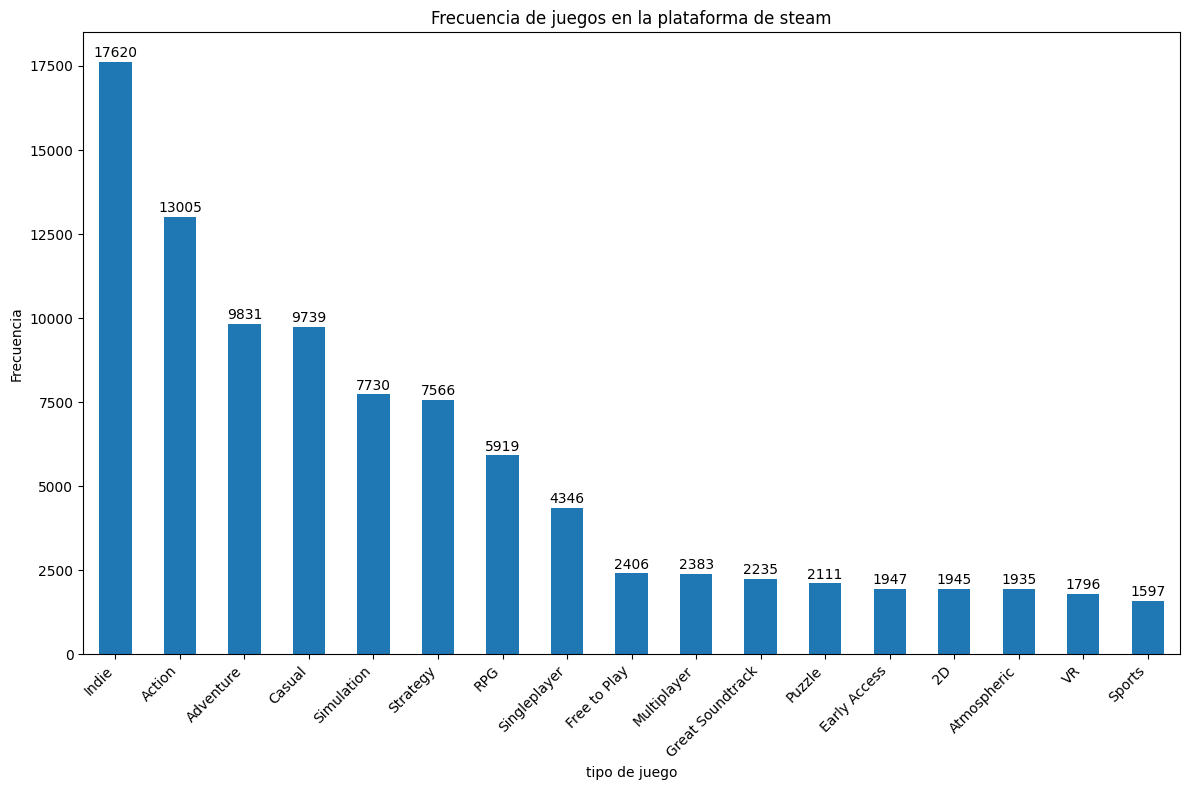

In [47]:
# Llenar los valores NaN en la columna 'tags' con una cadena vacía
df['tags'] = df['tags'].fillna('')

# Convertir las cadenas de la lista en listas de Python
tags_lists = df['tags'].apply(lambda x: x.strip('[]').replace("'", "").split(", "))

# Expandir las listas en una nueva Serie
tags_series = pd.Series([tag for sublist in tags_lists for tag in sublist])

# Calcular la frecuencia de cada etiqueta
tags_counts = tags_series.value_counts()

# Filtrar las etiquetas con una frecuencia mayor a 1500
tags_counts_filtered = tags_counts[tags_counts > 1500]

# Graficar el histograma
plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura
bars = tags_counts_filtered.plot(kind='bar')

# Agregar las etiquetas de las barras
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50, int(bar.get_height()), ha='center', va='bottom')

plt.xlabel('tipo de juego')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de juegos en la plataforma de steam')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()
